In [45]:
import pencil as pc
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path

PLOT_DIR = Path.cwd()
PROJECT_ROOT = PLOT_DIR.parent
RUNS_DIR = PROJECT_ROOT / "hydro_runs"
print(f"Project root directory: {PROJECT_ROOT}")

Project root directory: /home/mgurgeni/programming/ai_turbulence/pencil-code


In [46]:
path = RUNS_DIR / "1D_Kol256"
SIMS =  pc.get_sim(path)

In [47]:
specra = pc.read.power(datadir=SIMS.datadir)

appending lr
appending o
appending hel_kin
appending krms
appending kin
power_lr.dat
powero.dat
powerhel_kin.dat
power_krms.dat
power_kin.dat


In [48]:
specra_kin = specra.kin

In [49]:
specra_kin.shape
specra.krms

array([  0.  ,   1.41,   2.12,   3.32,   4.24,   5.2 ,   6.16,   7.14,
         8.12,   9.11,  10.1 ,  11.1 ,  12.1 ,  13.1 ,  14.1 ,  15.1 ,
        16.1 ,  17.1 ,  18.1 ,  19.1 ,  20.  ,  21.  ,  22.  ,  23.  ,
        24.  ,  25.  ,  26.  ,  27.  ,  28.  ,  29.  ,  30.  ,  31.  ,
        32.  ,  33.  ,  34.  ,  35.  ,  36.  ,  37.  ,  38.  ,  39.  ,
        40.  ,  41.  ,  42.  ,  43.  ,  44.  ,  45.  ,  46.  ,  47.  ,
        48.  ,  49.  ,  50.  ,  51.  ,  52.  ,  53.  ,  54.  ,  55.  ,
        56.  ,  57.  ,  58.  ,  59.  ,  60.  ,  61.  ,  62.  ,  63.  ,
        64.  ,  65.  ,  66.  ,  67.  ,  68.  ,  69.  ,  70.  ,  71.  ,
        72.  ,  73.  ,  74.  ,  75.  ,  76.  ,  77.  ,  78.  ,  79.  ,
        80.  ,  81.  ,  82.  ,  83.  ,  84.  ,  85.  ,  86.  ,  87.  ,
        88.  ,  89.  ,  90.  ,  91.  ,  92.  ,  93.  ,  94.  ,  95.  ,
        96.  ,  97.  ,  98.  ,  99.  , 100.  , 101.  , 102.  , 103.  ,
       104.  , 105.  , 106.  , 107.  , 108.  , 109.  , 110.  , 111.  ,
      

In [50]:
specra.keys()

t
lr
o
hel_kin
krms
kin


Text(0, 0.5, 'Kinetic Energy Spectrum E(k)')

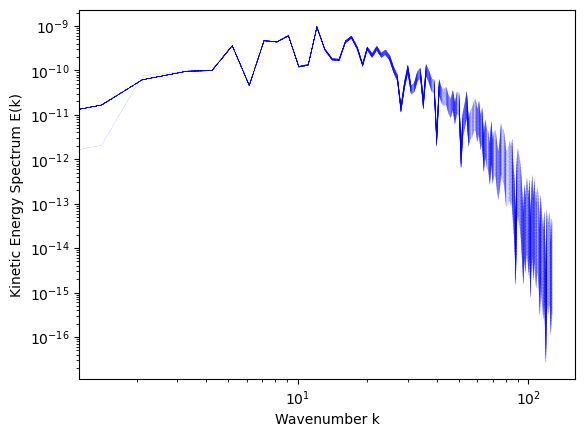

In [51]:
for line in specra_kin:
    plt.loglog(specra.krms, line, alpha=0.5, color='blue' , linewidth=0.2, linestyle="--")
plt.xlabel('Wavenumber k')
plt.ylabel('Kinetic Energy Spectrum E(k)')

In [52]:
vars  = []
vars = pc.read.var(datadir=SIMS.datadir,  quiet=True, trimall=True)

object completed in 3.85 seconds.


In [73]:
vars[0].lnrho.shape

(1, 1, 256)

In [54]:
uu  = vars.uu

In [55]:
uu.shape

(3, 1, 1, 256)

In [56]:
## Read multiple var files
vars = []
for i in range(4):
    vars_i = pc.read.var(datadir=SIMS.datadir, var_file=f'VAR{i}', quiet=True, trimall=True)
    vars.append(vars_i)

object completed in 3.87 seconds.
object completed in 3.93 seconds.
object completed in 3.84 seconds.
object completed in 3.77 seconds.


In [57]:
vars = np.asanyarray(vars)
vars.shape

(4,)

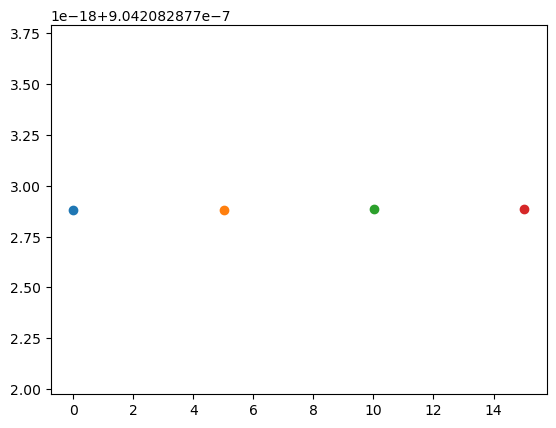

In [58]:
for i in range(4):
    plt.plot(vars[i].t, vars[i].uu.mean(), 'o')

In [ ]:
snapshots = []

for v in vars:     # vars already contains 4 fully assembled snapshots
    uu    = np.asarray(v.uu)       # shape (3,1,1,256)
    lnrho = np.asarray(v.lnrho)    # shape (1,1,256)
    t     = float(v.t)

    # Velocity components extracted correctly
    ux = uu[0].ravel()   # 256 points
    uy = uu[1].ravel()   # 256 points
    uz = uu[2].ravel()   # 256 points

    rho = lnrho.ravel()  # 256 points

    state = np.concatenate([
        np.array([t]),
        ux, uy, uz,
        rho
    ])

    snapshots.append(state)

snapshots = np.vstack(snapshots)
print("snapshots shape:", snapshots.shape)


snapshots shape: (4, 1025)


In [78]:
# You already had:
# PLOT_DIR = Path.cwd()
# PROJECT_ROOT = PLOT_DIR.parent        # -> pencil-code
# RUNS_DIR = PROJECT_ROOT / "hydro_runs"

AIP_ROOT     = PROJECT_ROOT.parent      # -> ai_turbulence
BACKEND_DATA = AIP_ROOT /"aipoincare" / "backend" / "data"
BACKEND_DATA.mkdir(parents=True, exist_ok=True)

txt_path = BACKEND_DATA / "1D_Kol256_uu_lnrho_4snapshots.txt"
npy_path = BACKEND_DATA / "1D_Kol256_uu_lnrho_4snapshots.npy"

np.savetxt(txt_path, snapshots)
np.save(npy_path, snapshots)

print("Saved TEXT to:", txt_path)
print("Saved NPY  to:", npy_path)


Saved TEXT to: /home/mgurgeni/programming/ai_turbulence/aipoincare/backend/data/1D_Kol256_uu_lnrho_4snapshots.txt
Saved NPY  to: /home/mgurgeni/programming/ai_turbulence/aipoincare/backend/data/1D_Kol256_uu_lnrho_4snapshots.npy
